<a href="https://colab.research.google.com/github/ektaarora3501/tensorflow/blob/master/linear_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow-gpu

In [0]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [4]:
from google.colab import files
uploaded=files.upload()


Saving kc_house_data.csv to kc_house_data.csv


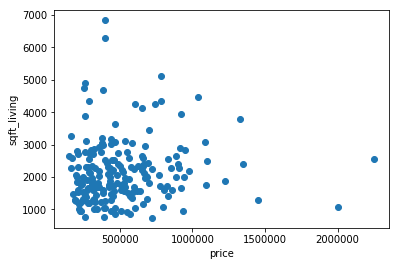

In [10]:
import io
df2=io.BytesIO(uploaded['kc_house_data.csv'])
x_train=pd.read_csv(df2,nrows=200,usecols=[2],skiprows=[0],header=None)
y_train=pd.read_csv(df2,nrows=200,usecols=[5],skiprows=[0],header=None)
plt.xlabel('price')
plt.ylabel('sqft_living')
plt.scatter(x_train,y_train)
plt.show()

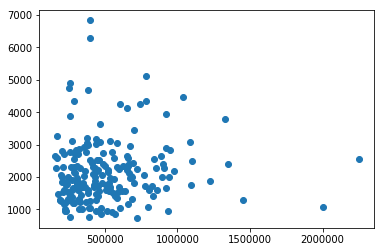

In [14]:
learning_rate=0.01
X=tf.placeholder(tf.float32)
Y=tf.placeholder(tf.float32)

def model(X,w):
  return tf.multiply(X,w)

w=tf.Variable(0.0,name="weight")
y_model=model(X,w)
cost=tf.reduce_mean(Y-y_model)

train_op=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)

for i in range(0,199):
  for (x,y) in zip(x_train,y_train):
    sess.run(train_op,feed_dict={X:x,Y:y})
    
w_val=sess.run(w)
y_learned=x_train*w_val
plt.scatter(x_train,y_train)
#plt.plot(x_train,y_learned,'r')
plt.show()

